In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import SVR

## Load data frame

In [2]:
df = pd.read_pickle(os.path.join("processed_data", "df_merged.pkl"))

## Split the data

In [3]:
X = df[["kilocalories", "gdp", "urbanization"]]
Y = pd.DataFrame(df["obesity_rate"])

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Create and evaluate models

In [5]:
# function for visualizing predictions and scoring them
def visualize_and_calculate_scores(Y_test, Y_pred):
    distances = np.abs(Y_pred - Y_test)
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    plt.figure(figsize=(12, 4))
    plt.style.use("ggplot")
    plt.scatter(
        range(len(Y_test)),
        Y_test,
        color="blue",
        label="Y_test (prawdziwa wartość)",
        alpha=0.6,
    )
    plt.scatter(
        range(len(Y_pred)),
        Y_pred,
        color="red",
        label="Y_pred (przewidziana wartość)",
        alpha=0.85,
    )
    plt.plot(
        range(len(distances)),
        distances,
        color="yellow",
        label="Wielkość błędu",
    )
    plt.xlabel("Liczba próbek")
    plt.ylabel("Otyłość %")

    plt.legend(loc="upper right")
    plt.title("Porównanie wartości przewidywanych z wartościami prawdziwymi")
    plt.show()

    return {"mae": mae, "mse": mse, "r2": r2}


# function for dispalying table with results
def scores_to_table(scores):
    data = [
        ["MAE", "MSE", "R2"],
        [
            f"{round(scores['mae'],3)}",
            f"{round(scores['mse'],3)}",
            f"{round(scores['r2'],3)}",
        ],
    ]

    fig, ax = plt.subplots(figsize=(5, 1), dpi=200)

    ax.axis("off")

    table = ax.table(cellText=data, loc="center", cellLoc="center")

    for i in range(len(data[0])):
        table[0, i].set_text_props(weight="bold")

    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.3, 1.3)
    plt.tight_layout()
    plt.show()

## Linear regression

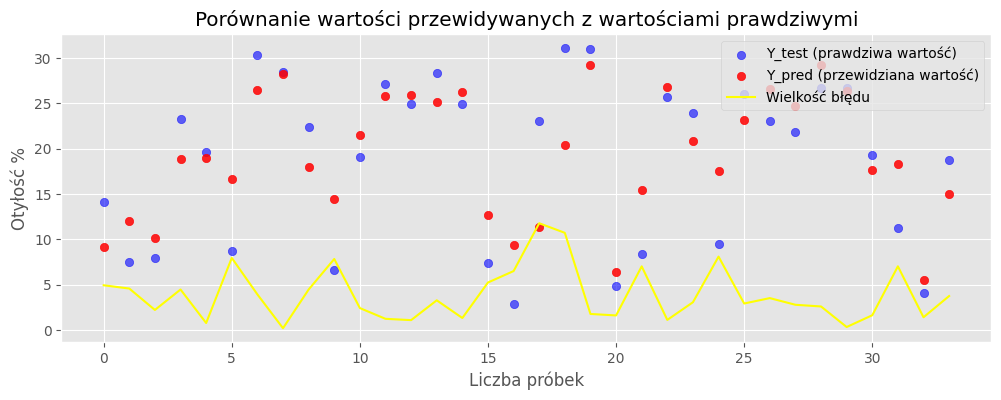

{'mae': 3.9270906468945856, 'mse': 23.822136524639877, 'r2': 0.6957501206466197}


In [6]:
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

linreg.fit(X_train, Y_train)
Y_pred_linreg = linreg.predict(X_test)


linreg_scores = visualize_and_calculate_scores(Y_test, Y_pred_linreg)
print(linreg_scores)

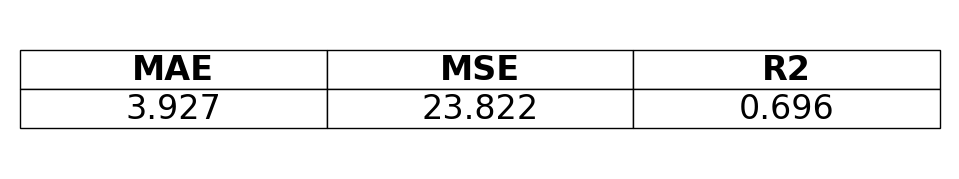

In [7]:
scores_to_table(linreg_scores)

## Generalized linear model

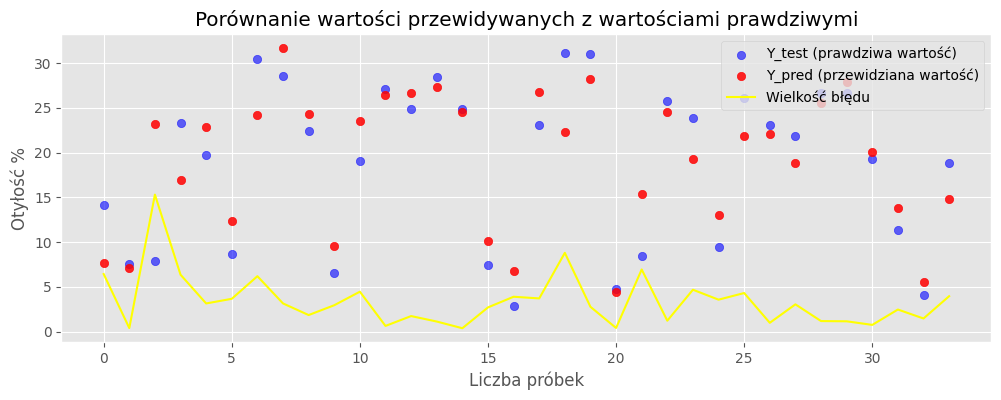

{'mae': 3.404587085217744, 'mse': 20.176233725903543, 'r2': 0.7423146042941018}


In [8]:
glm = LinearRegression()
gen_features = PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)
glm.fit(gen_features.fit_transform(X_train), Y_train)

Y_pred_glm = glm.predict(gen_features.fit_transform(X_test))
glm_scores = visualize_and_calculate_scores(Y_test, Y_pred_glm)
print(glm_scores)

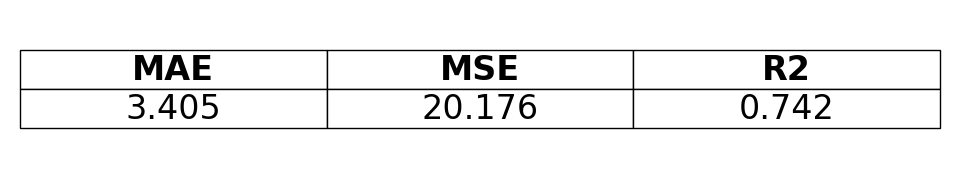

In [9]:
scores_to_table(glm_scores)

## Support Vector Regression

/home/sejsmo/repos/obesity-causes-python-analysis/env/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


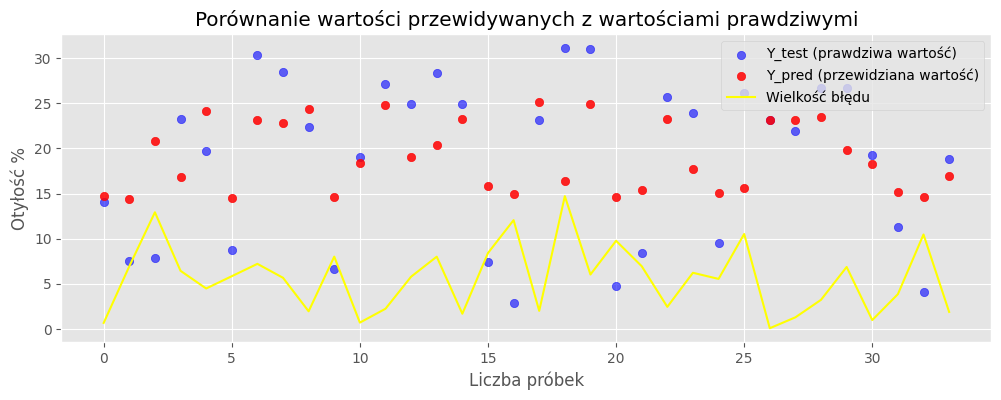

{'mae': 5.648151240414234, 'mse': 45.934990208771794, 'r2': 0.41333073905180306}


In [10]:
svr = SVR(kernel="rbf")
svr.fit(X_train, Y_train)

Y_pred_svr = svr.predict(X_test).reshape(-1, 1)
svr_scores = visualize_and_calculate_scores(Y_test, Y_pred_svr)
print(svr_scores)

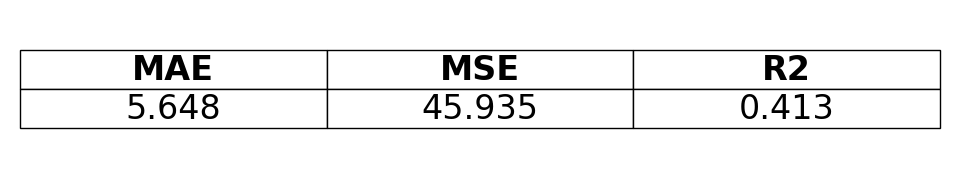

In [11]:
scores_to_table(svr_scores)

/home/sejsmo/repos/obesity-causes-python-analysis/env/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


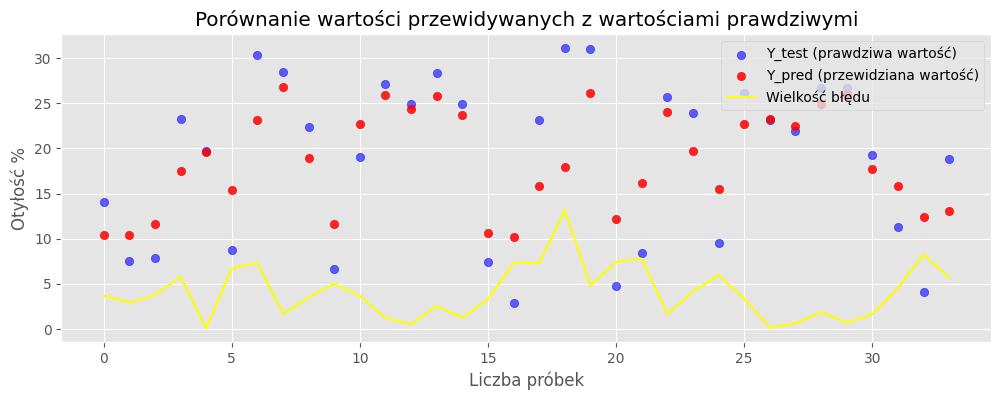

{'mae': 4.09008032211694, 'mse': 25.143878630568906, 'r2': 0.6788691882479136}


In [12]:
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)
svr = SVR(kernel="rbf")
svr.fit(X_train_scaled, Y_train)

Y_pred_svr_scaled = svr.predict(X_test_scaled).reshape(-1, 1)
svr_scaled_scores = visualize_and_calculate_scores(Y_test, Y_pred_svr_scaled)
print(svr_scaled_scores)

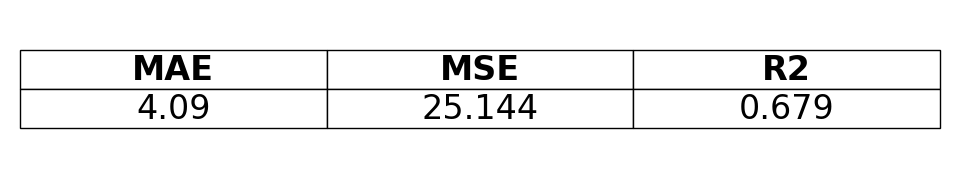

In [13]:
scores_to_table(svr_scaled_scores)

## Results

In [14]:
results_dict = {
    "Linear Regression": linreg_scores,
    "Generalized Linear Model": glm_scores,
    "SVR": svr_scores,
    "SVR after scaling": svr_scaled_scores,
}

combined_results = pd.DataFrame(results_dict).T

print(combined_results)

                               mae        mse        r2
Linear Regression         3.927091  23.822137  0.695750
Generalized Linear Model  3.404587  20.176234  0.742315
SVR                       5.648151  45.934990  0.413331
SVR after scaling         4.090080  25.143879  0.678869


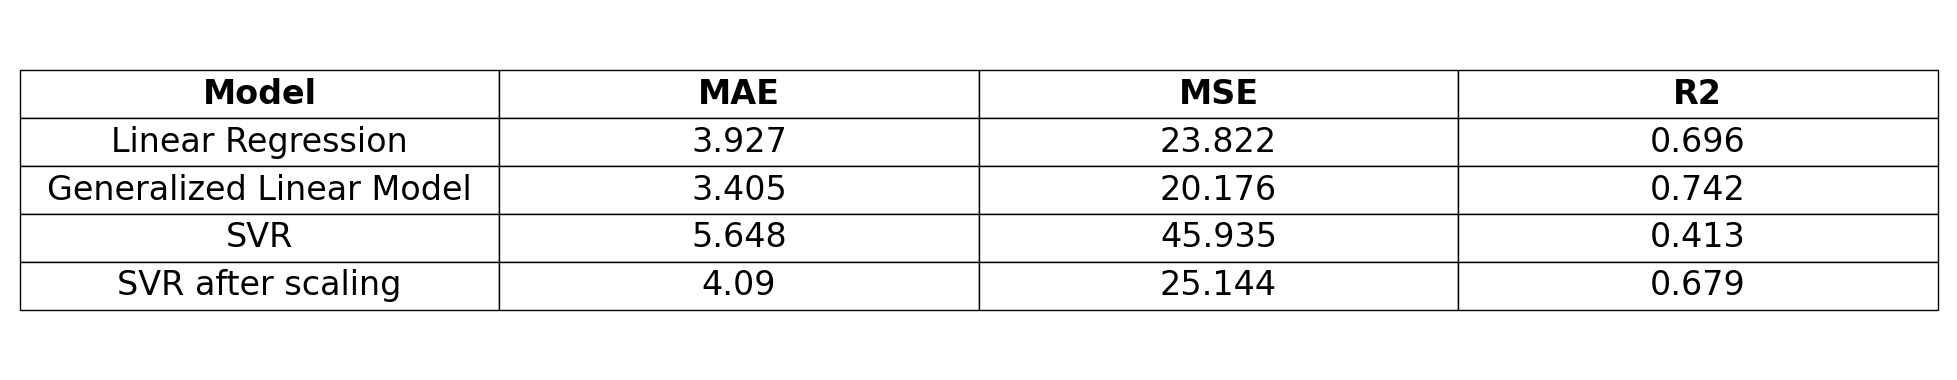

In [15]:
data = [
    ["Model", "MAE", "MSE", "R2"],
]

for key, value in results_dict.items():
    data.append(
        [key, round(value["mae"], 3), round(value["mse"], 3), round(value["r2"], 3)]
    )

fig, ax = plt.subplots(figsize=(10, 2), dpi=200)

ax.axis("off")

table = ax.table(cellText=data, loc="center", cellLoc="center")

for i in range(len(data[0])):
    table[0, i].set_text_props(weight="bold")

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.3, 1.3)
plt.tight_layout()
plt.show()

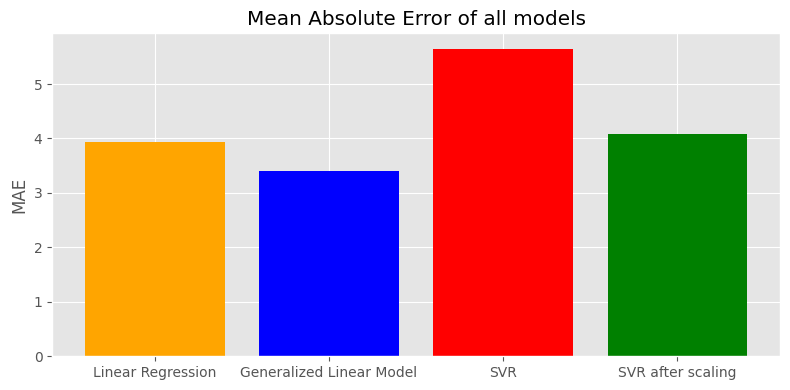

In [16]:
plt.figure(figsize=(8, 4))
colors = ["orange", "blue", "red", "green"]

plt.bar(
    data=combined_results,
    x=combined_results.index,
    height=combined_results["mae"],
    color=colors,
)
plt.title("Mean Absolute Error of all models")
plt.ylabel("MAE")

plt.tight_layout()
plt.show()

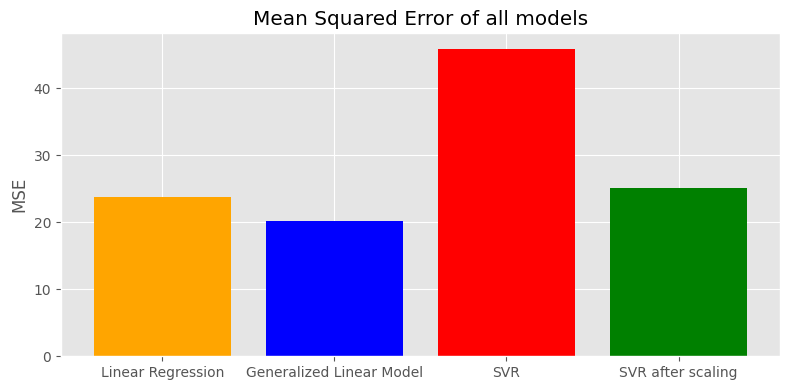

In [17]:
plt.figure(figsize=(8, 4))

plt.bar(
    data=combined_results,
    x=combined_results.index,
    height=combined_results["mse"],
    color=colors,
)
plt.title("Mean Squared Error of all models")
plt.ylabel("MSE")

plt.tight_layout()
plt.show()

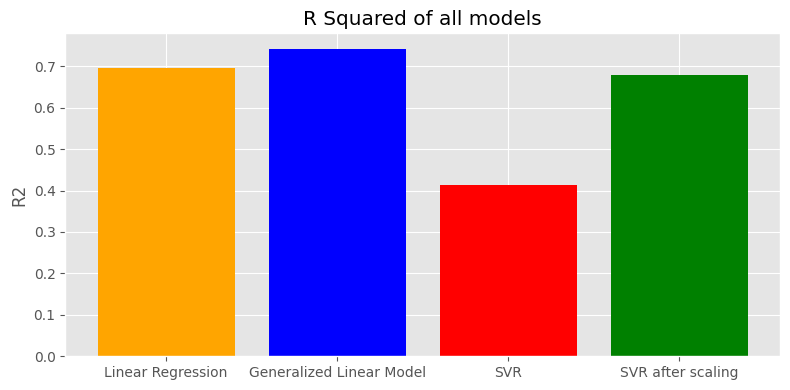

In [18]:
plt.figure(figsize=(8, 4))

plt.bar(
    data=combined_results,
    x=combined_results.index,
    height=combined_results["r2"],
    color=colors,
)
plt.title("R Squared of all models")
plt.ylabel("R2")

plt.tight_layout()
plt.show()